### K-Nearest Neighbors Classifier

Implement a KNN model to classify the animals in to categorie

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### Zoo Dataset

In [2]:
zoo_df = pd.read_csv('Zoo.csv')

In [3]:
zoo_df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### Exploratory Data Analysis 

In [4]:
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
zoo_df['animal name'].nunique() #100 categories

100

In [6]:
zoo_df = zoo_df.drop('animal name',axis=1)

<AxesSubplot:ylabel='legs'>

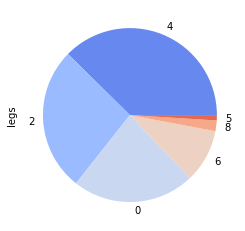

In [18]:
plt.figure(figsize=(10,4))
colors=sns.color_palette('coolwarm')
zoo_df['legs'].value_counts().plot(kind='pie', colors = colors)

<AxesSubplot:xlabel='type', ylabel='count'>

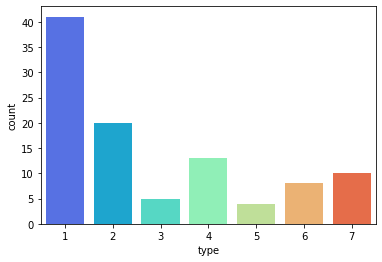

In [19]:
sns.countplot(x = zoo_df['type'],palette='rainbow')

In [14]:
zoo_df.groupby(by='type').sum().drop('legs',axis=1)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,tail,domestic,catsize
type,,,,,,,,,,,,,,,
1,39,0,1,41,2,6,22,40,41,41,0,4,35,8,32
2,0,20,20,0,16,6,9,0,20,20,0,0,20,3,6
3,0,0,4,0,0,1,4,4,5,4,2,0,5,0,1
4,0,0,13,0,0,13,9,13,13,0,1,13,13,1,4
5,0,0,4,0,0,4,3,4,4,4,1,0,1,0,0
6,4,0,8,0,6,0,1,0,0,8,2,0,0,1,0
7,0,0,9,0,0,6,8,0,0,3,2,0,1,0,1


### Standardization

In [21]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(zoo_df.iloc[:,:-1])
y = zoo_df['type']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

### KNN Classifier Model

In [25]:
knn = KNeighborsClassifier()

knn.fit(X,y)

KNeighborsClassifier()

### Predictions 

In [26]:
knn.predict(X_test)

array([2, 2, 2, 4, 4, 2, 1, 1, 5, 1, 2, 1, 3, 2, 1, 1, 2, 1, 4, 1, 4, 7,
       5, 1, 4, 4], dtype=int64)

### Finding Optimum number of K neighbors

In [28]:
error_rate = []

# Will take some time
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

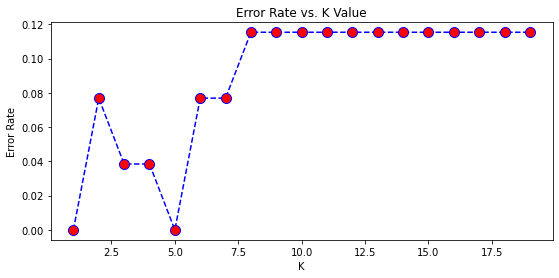

In [47]:
plt.figure(figsize=(9,4))

plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
# optimum number of K is 5 according to figure above
knn1 = KNeighborsClassifier(n_neighbors=5)

knn1.fit(X,y)

KNeighborsClassifier()

### Predictions on train data


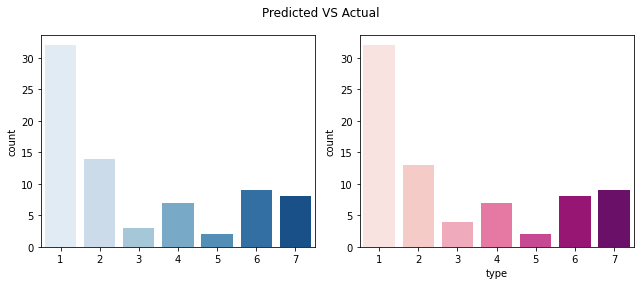

In [39]:
pred = knn1.predict(X_train)

f, axs = plt.subplots(1,2, figsize=(9,4))
f.suptitle("Predicted VS Actual")

sns.countplot(x=pred, ax=axs[0], palette='Blues')
sns.countplot(x=y_train, ax=axs[1], palette='RdPu')
f.tight_layout()

### Predictions on Test data

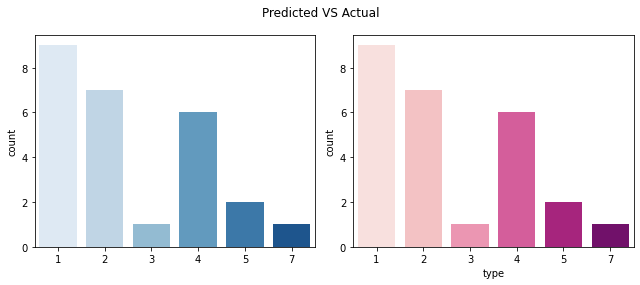

In [40]:
predtest = knn1.predict(X_test)

f, axs = plt.subplots(1,2, figsize=(9,4))
f.suptitle("Predicted VS Actual")

sns.countplot(x=predtest, ax=axs[0], palette='Blues') #countplot for predicted values
sns.countplot(x=y_test, ax=axs[1], palette='RdPu') # countplot for actual values
f.tight_layout()